# HDDA. Lab5. LDA.

## Discrimination & Classification 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, optimize
import pandas as pd

In [6]:
%matplotlib inline

In [7]:
from sklearn.datasets import make_blobs

In [8]:
X, Y = make_blobs(n_samples=400, n_features=2, cluster_std=1.0,
                  centers=[(-5, -5), (0, 0), (5, 5)], shuffle=False, random_state=42)
color_map = dict(zip(np.unique(Y), ["red", "blue", "green"]))


{<matplotlib.collections.PathCollection at 0x7f7ff638a550>,
 <matplotlib.collections.PathCollection at 0x7f7ff638ae10>}

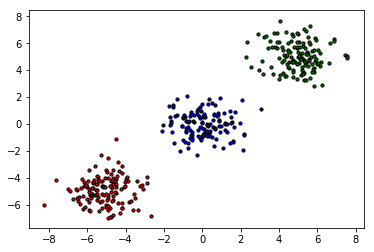

In [9]:
{plt.scatter(X[Y == k, 0], X[Y == k, 1], c=v, s=10, edgecolor='k') for (k,v) in color_map.items()}

Text(0.5,1,'LDA')

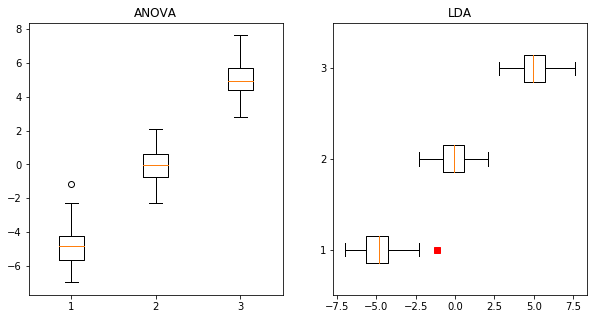

In [10]:
A = list(zip(X, Y))
bycategory = list()
for j in np.unique(Y):
    bycategory.append([k[1] for (k,v) in A if v == j])
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.boxplot(bycategory)
plt.title('ANOVA')

plt.subplot(122)
plt.boxplot(bycategory, 0, 'rs', 0)
plt.title('LDA')

LDA is like inverted ANOVA: ANOVA looks for differences in a continuous response among categories, whereas LDA infers categories using a continuous predictor. LDA assumes that the variance in each group is the same, and that the predictor(s) are normally distributed for each group. In other words, different $\mu_k$, one shared $\sigma$.

Text(0,0.5,'Probability')

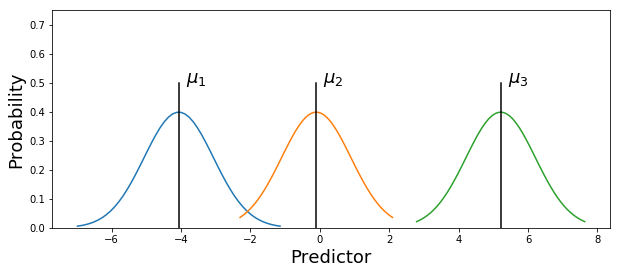

In [11]:
cdfs = list()
for i in np.unique(Y):
    cdfs.append(np.linspace(min(bycategory[i]), max(bycategory[i]), 50))
plt.figure(figsize=(10, 4))
k = 1
for x in cdfs:
    mu_k = x.mean()
    plt.plot(x, stats.norm.pdf(x, loc=mu_k))
    plt.plot([mu_k, mu_k], [0, 0.5], c='k')
    plt.text(mu_k + 0.2, 0.5, "$\mu_%i$" % k, size=18)
    k += 1
plt.ylim(0, 0.75)

plt.xlabel('Predictor', size=18)
plt.ylabel('Probability', size=18)

### Cross Validation

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import cross_validation

In [15]:
lda = LDA(solver='lsqr', shrinkage=None).fit(X, Y)
k_fold = cross_validation.KFold(len(A), 3, shuffle=True)
print('LDA Results: ')
for (trn, tst) in k_fold:
    lda.fit(X[trn], Y[trn])
    outVal = lda.score(X[tst], Y[tst])

print('Score: ' + str(outVal))

LDA Results: 
Score: 1.0


## LDA as projection method
[Comparison of LDA and PCA 2D projection of Iris dataset](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

explained variance ratio (first two components): [0.92461621 0.05301557]


Text(0.5,1,'LDA of IRIS dataset')

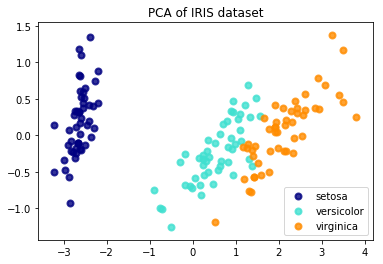

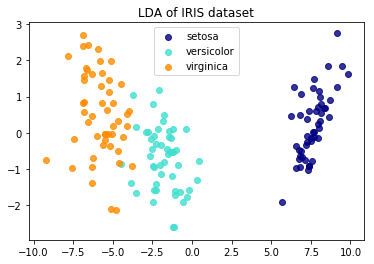

In [16]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

## ROC curve

Provides a visual summary of the confusion matrix over a range of criteria. Given a confusion matrix, $N=TN+FP$, $P=TP+FN$.

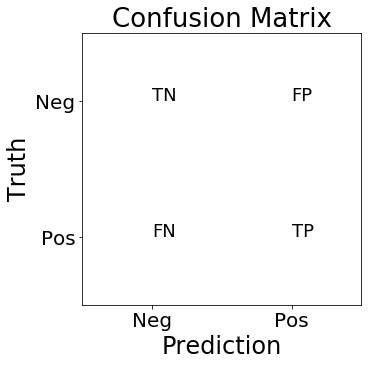

In [3]:
plt.figure(figsize=(5, 5))
plt.text(0.25, 0.75, 'TN', size=18)
plt.text(0.75, 0.75, 'FP', size=18)
plt.text(0.25, 0.25, 'FN', size=18)
plt.text(0.75, 0.25, 'TP', size=18)

plt.xticks([0.25, 0.75], ['Neg', 'Pos'], size=20)
plt.yticks([0.25, 0.75], ['Pos', 'Neg'], size=20)
plt.ylabel('Truth', size=24)
plt.xlabel('Prediction', size=24)
plt.title('Confusion Matrix', size=26)
plt.show()

The true positive rate, or Power (or Sensitivity) is $\frac{TP}{P}$ and the Type 1 error is $\frac{FP}{N}$. The ROC curve shows Power vs. Type 1 error. Ideally, we can achieve a high true positive rate at a very low false positive rate:

[ROC curve](http://arogozhnikov.github.io/2015/10/05/roc-curve.html)

### Breast cancer ROC demo

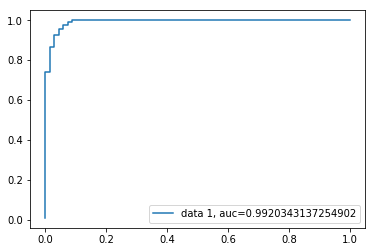

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Lab Session Task:  

Let's consider `Wine.csv`. First 13 columns i.e. independent variables are contents of wine. Last column is customer segment. It has 3 values. This is a classification problem. Our objective is to reduce 13 independent variables to `n_components`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split

from matplotlib.colors import ListedColormap

In [ ]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

### Task 1: determine an effective dimension reduction (EDR)

In [ ]:
### YOUR CODE HERE


### Task 2: use you EDR for PCA n_components in a template below 

In [ ]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
### USE YOUR  EDR HERE (n_components) 

pca = PCA(n_components = ???)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [ ]:
X_set, y_set = X_test, y_test
 
aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Principal Component Analysis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

### Task 3: use you EDR for LDA n_components in a template below. Compare LDA with PCA

In [ ]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
### USE YOUR  EDR HERE (n_components) 

lda = LDA(n_components = ???)
X_train = lda.fit_transform(X_train)
X_test = lda.transform(X_test)

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [ ]:
X_set, y_set = X_test, y_test
 
aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'blue', 'green')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Linear Discriminant Analysis')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()

## LDA performing

### Shrinkage
[Normal and Shrinkage Linear Discriminant Analysis for classification](http://scikit-learn.org/stable/auto_examples/classification/plot_lda.html)

In [ ]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. \
shrinkage Linear Discriminant Analysis (1 discriminative feature)')


### LP problem
[Linear and Quadratic Discriminant Analysis](http://scikit-learn.org/stable/modules/lda_qda.html)

- **Quadratic Discriminant Analysis** (QDA): Each class uses its own estimate of variance (or covariance when there are multiple input variables).
- **Flexible Discriminant Analysis** (FDA): Where non-linear combinations of inputs is used such as splines.
- **Regularized Discriminant Analysis** (RDA): Introduces regularization into the estimate of the variance (actually covariance), moderating the influence of different variables on LDA.

In [ ]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 0.5

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red', markeredgecolor='k')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000', markeredgecolor='k')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue', markeredgecolor='k')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099', markeredgecolor='k')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10, markeredgecolor='k')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10, markeredgecolor='k')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='yellow',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariances_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariances_[1], 'blue')

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant'
             'Analysis')
plt.show()

## Home Assignment. Linear DA vs. Quadratic DA. (for all)

In [ ]:
import pandas as pd
dataset = pd.read_csv('./Hemocrit.csv')

In [ ]:
dataset.describe()

In [ ]:
dataset.head()

In [ ]:
np.unique(dataset['status'])

#### Task 1: Implement your LDA function using template below

In [ ]:
class LDA():
    def __init__(self, n_components=None):
        # YOUR CODE HERE
    def fit(self, X, y):
        # YOUR CODE HERE
    def predict(self, X):
        # YOUR CODE HERE
    def fit_transform(self, X, y=None):
        # YOUR CODE HERE

In [ ]:
#### Implement your QDA function using template below

In [ ]:
class QDA():
    def __init__(self, n_components=None):
        # YOUR CODE HERE
    def fit(self, X, y):
        # YOUR CODE HERE
    def predict(self, X):
        # YOUR CODE HERE
    def fit_transform(self, X, y=None):
        # YOUR CODE HERE

#### Task 2: Dataset prediction
- Separate your `dataset` into train, test subsets
- Predict by using LDA
- Predict by using QDA

#### Task 3: Plot ROC curves for LDA and QDA

In [ ]:
plt.title('LDA ROC curve')

# YOUR CODE HERE

plt.ylabel('TPR (power)')
plt.xlabel('FPR (type 1 error)')

In [ ]:
plt.title('QDA ROC curve')

# YOUR CODE HERE

plt.ylabel('TPR (power)')
plt.xlabel('FPR (type 1 error)')

## Home Assignment. Addition for champions.

#### Extra task for champions
- Perform your LDA by second reguralization parameter (Shrinkage)
- Perform your QDA by second reguralization parameter (Shrinkage)
- Demonstrate how does it work on `make_blobs` example (see template)

[template](http://scikit-learn.org/stable/auto_examples/classification/plot_lda.html)